In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import joblib 

In [2]:
df1=pd.read_csv("laptop.csv")
df=df1.copy()
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df["Cpu"].value_counts().count()

np.int64(118)

In [4]:
df.shape

(1303, 13)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [8]:
df=df.drop(columns=['Unnamed: 0.1','Unnamed: 0','ScreenResolution'])

In [9]:
# Extract only "Intel Core i5", "Intel Core i7", etc., or "Intel Celeron"
df['Cpu']= df['Cpu'].str.extract(r'(Intel Core i\d+|Intel Celeron)')

# Verify the changes
print(df['Cpu'].head())


0    Intel Core i5
1    Intel Core i5
2    Intel Core i5
3    Intel Core i7
4    Intel Core i5
Name: Cpu, dtype: object


In [10]:
df["Cpu"].value_counts().count()

np.int64(4)

In [11]:
df["Cpu"].isna().sum()

np.int64(157)

In [12]:
df['Cpu'].unique()
df['Cpu'].isna().sum()


np.int64(157)

In [13]:
df.isna().sum()

Company      30
TypeName     30
Inches       30
Cpu         157
Ram          30
Memory       30
Gpu          30
OpSys        30
Weight       30
Price        30
dtype: int64

In [14]:
df['Cpu'].value_counts().count()

np.int64(4)

In [15]:
unique_values = df['Gpu'].value_counts()
print(unique_values)

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64


In [16]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price'],
      dtype='object')

In [17]:
%%capture
for col in df:
    if df[col].dtype == 'object':  # For categorical columns
        mode_value = df[col].mode()[0]  
        df[col].fillna(mode_value, inplace=True)  
    else:  # For numerical columns
        median_value = df[col].median()  
        df[col].fillna(median_value, inplace=True)


In [18]:
df.isna().sum()

Company     0
TypeName    0
Inches      0
Cpu         0
Ram         0
Memory      0
Gpu         0
OpSys       0
Weight      0
Price       0
dtype: int64

In [19]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Intel Core i5,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [20]:
df["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [21]:
df['Ram'] = df['Ram'].str.replace('GB', '', regex=False)
df['Ram'] = df['Ram'].astype(int) 

In [22]:
import numpy as np
# Replace 'kg' with an empty string
df['Weight'] = df['Weight'].str.replace('kg', '', regex=False)
# Replace any non-numeric entries (like '?') with NaN
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
# Convert column to float
df['Weight'] = df['Weight'].astype(float)

In [23]:
df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')

# Now convert to float
df['Inches'] = df['Inches'].astype(float)

In [24]:
df['OpSys'] = df['OpSys'].replace("No OS", "Windows 10")

In [25]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.0000
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [26]:
df["Gpu"].nunique()

110

In [27]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.86,30636.0000
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [28]:
import re
df["Memory"] = df["Memory"].apply(lambda x: ' '.join(re.findall(r'\d+(?:GB|TB|Flash|SSD|HDD)?', x)))
df["Memory"]

0       128GB
1       128GB
2       256GB
3       512GB
4       256GB
        ...  
1298    128GB
1299    512GB
1300     64GB
1301      1TB
1302    500GB
Name: Memory, Length: 1303, dtype: object

In [29]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Intel Core i5,8,256GB,Intel HD Graphics 620,Windows 10,1.86,30636.0000
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


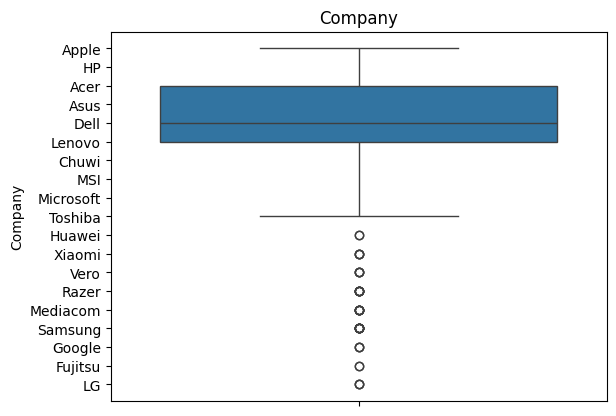

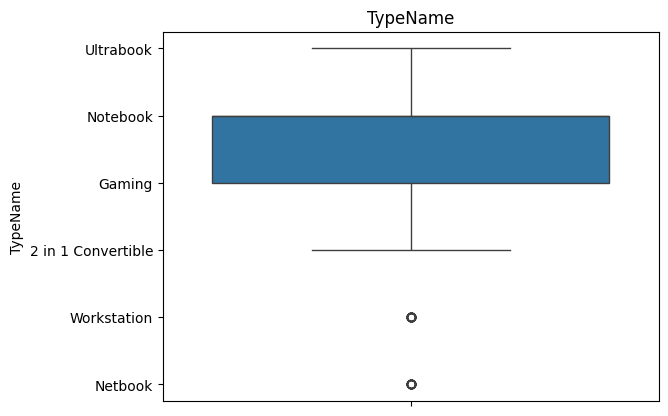

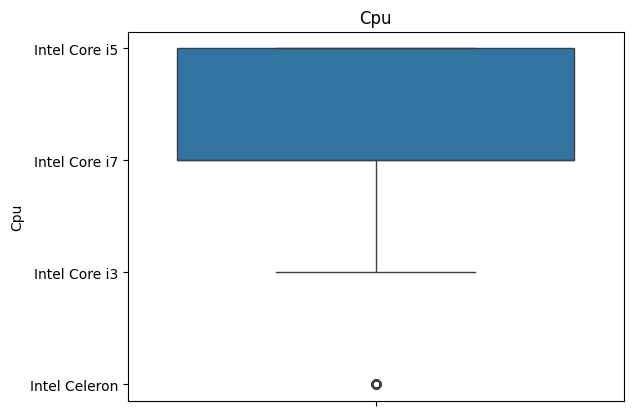

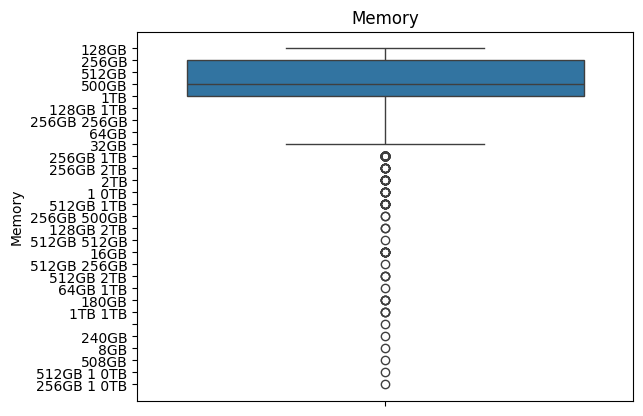

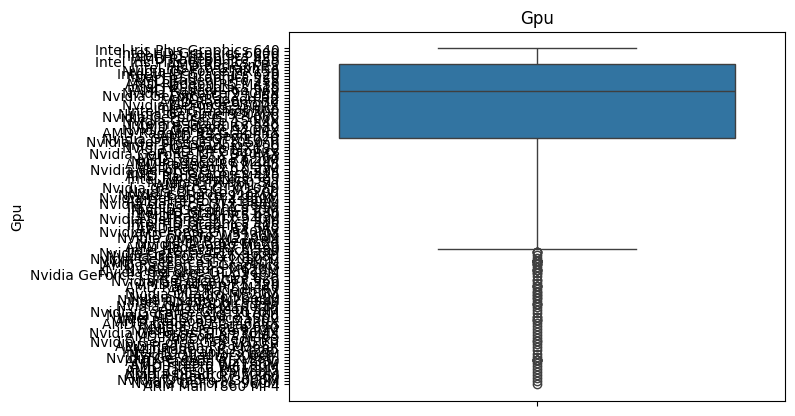

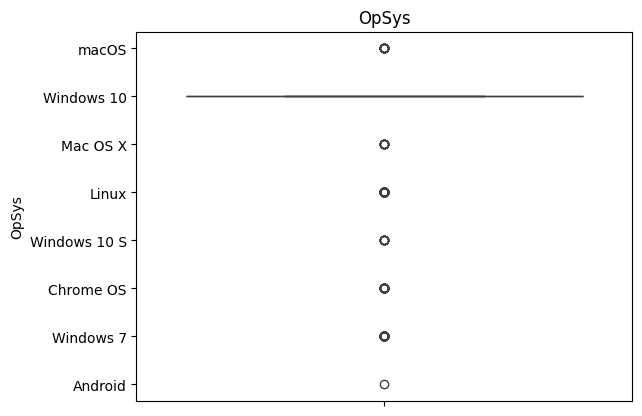

In [30]:
for i in df.select_dtypes(include="object").columns:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Company   1303 non-null   object 
 1   TypeName  1303 non-null   object 
 2   Inches    1302 non-null   float64
 3   Cpu       1303 non-null   object 
 4   Ram       1303 non-null   int64  
 5   Memory    1303 non-null   object 
 6   Gpu       1303 non-null   object 
 7   OpSys     1303 non-null   object 
 8   Weight    1302 non-null   float64
 9   Price     1303 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 101.9+ KB


In [32]:
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Intel Core i5,8,256GB,Intel HD Graphics 620,Windows 10,1.86,30636.0000
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7,4,128GB,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7,16,512GB,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14.0,Intel Celeron,2,64GB,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,Intel Core i7,6,1TB,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [33]:
df["Company"].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [34]:
df["TypeName"].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [35]:
df["Cpu"].unique()

array(['Intel Core i5', 'Intel Core i7', 'Intel Core i3', 'Intel Celeron'],
      dtype=object)

In [36]:
df["Memory"].unique()

array(['128GB', '256GB', '512GB', '500GB', '1TB', '128GB 1TB',
       '256GB 256GB', '64GB', '32GB', '256GB 1TB', '256GB 2TB', '2TB',
       '1 0TB', '512GB 1TB', '256GB 500GB', '128GB 2TB', '512GB 512GB',
       '16GB', '512GB 256GB', '512GB 2TB', '64GB 1TB', '180GB', '1TB 1TB',
       '', '240GB', '8GB', '508GB', '512GB 1 0TB', '256GB 1 0TB'],
      dtype=object)

In [37]:
df["Gpu"].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [38]:
# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Now print the unique values from the column
print(df['Gpu'].unique())

['Intel Iris Plus Graphics 640' 'Intel HD Graphics 6000'
 'Intel HD Graphics 620' 'AMD Radeon Pro 455'
 'Intel Iris Plus Graphics 650' 'AMD Radeon R5' 'Intel Iris Pro Graphics'
 'Nvidia GeForce MX150' 'Intel UHD Graphics 620' 'Intel HD Graphics 520'
 'AMD Radeon Pro 555' 'AMD Radeon R5 M430' 'Intel HD Graphics 615'
 'AMD Radeon Pro 560' 'Nvidia GeForce 940MX' 'Nvidia GeForce GTX 1050'
 'AMD Radeon R2' 'AMD Radeon 530' 'Nvidia GeForce 930MX'
 'Intel HD Graphics' 'Intel HD Graphics 500' 'Nvidia GeForce 930MX '
 'Nvidia GeForce GTX 1060' 'Nvidia GeForce 150MX'
 'Intel Iris Graphics 540' 'AMD Radeon RX 580' 'Nvidia GeForce 920MX'
 'AMD Radeon R4 Graphics' 'AMD Radeon 520' 'Nvidia GeForce GTX 1070'
 'Nvidia GeForce GTX 1050 Ti' 'Intel HD Graphics 400'
 'Nvidia GeForce MX130' 'AMD R4 Graphics' 'Nvidia GeForce GTX 940MX'
 'AMD Radeon RX 560' 'Nvidia GeForce 920M' 'AMD Radeon R7 M445'
 'AMD Radeon RX 550' 'Nvidia GeForce GTX 1050M' 'Intel HD Graphics 515'
 'AMD Radeon R5 M420' 'Intel HD Graphi

In [39]:
df["OpSys"].unique()

array(['macOS', 'Windows 10', 'Mac OS X', 'Linux', 'Windows 10 S',
       'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [40]:
import pandas as pd

# Get sorted unique GPU values and convert to DataFrame
gpu_df = pd.DataFrame(sorted(df["Gpu"].unique()), columns=["Unique GPU Names"])

# Display the sorted DataFrame
print(gpu_df)


                   Unique GPU Names
0                AMD FirePro W4190M
1               AMD FirePro W4190M 
2                AMD FirePro W5130M
3                AMD FirePro W6150M
4                    AMD R17M-M1-70
5                   AMD R4 Graphics
6                    AMD Radeon 520
7                    AMD Radeon 530
8                    AMD Radeon 540
9                AMD Radeon Pro 455
10               AMD Radeon Pro 555
11               AMD Radeon Pro 560
12                    AMD Radeon R2
13           AMD Radeon R2 Graphics
14                    AMD Radeon R3
15                    AMD Radeon R4
16           AMD Radeon R4 Graphics
17                    AMD Radeon R5
18                AMD Radeon R5 430
19                AMD Radeon R5 520
20               AMD Radeon R5 M315
21               AMD Radeon R5 M330
22               AMD Radeon R5 M420
23              AMD Radeon R5 M420X
24               AMD Radeon R5 M430
25                    AMD Radeon R7
26           AMD Radeon R7 G

In [41]:
# now convert categorical data to numerical data 
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
for i in df.select_dtypes(include="object").columns:
  df[i]=lr.fit_transform(df[i])

In [42]:
df.dtypes

Company       int64
TypeName      int64
Inches      float64
Cpu           int64
Ram           int64
Memory        int64
Gpu           int64
OpSys         int64
Weight      float64
Price       float64
dtype: object

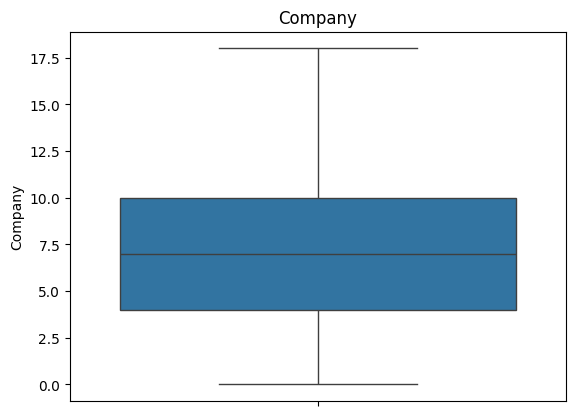

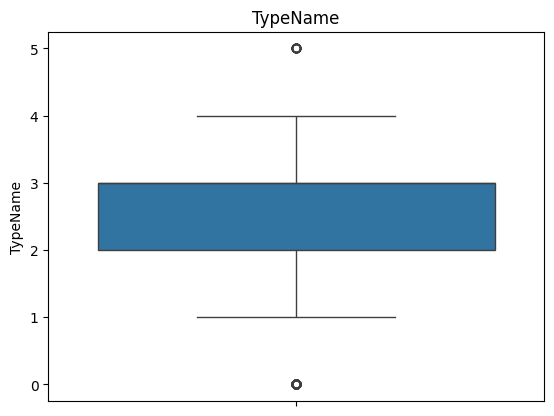

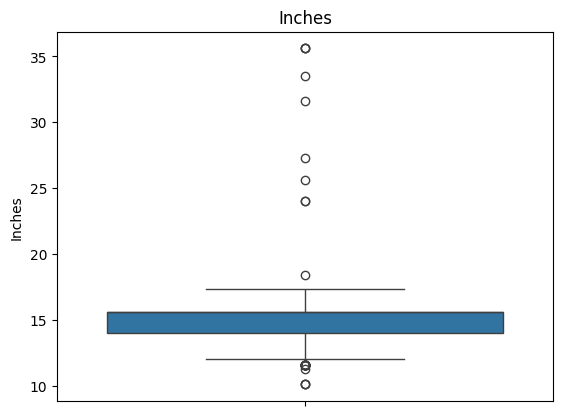

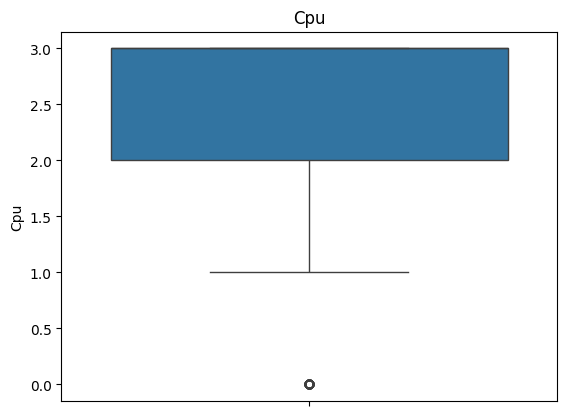

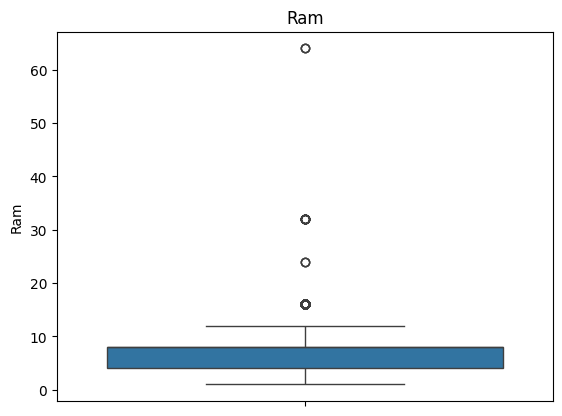

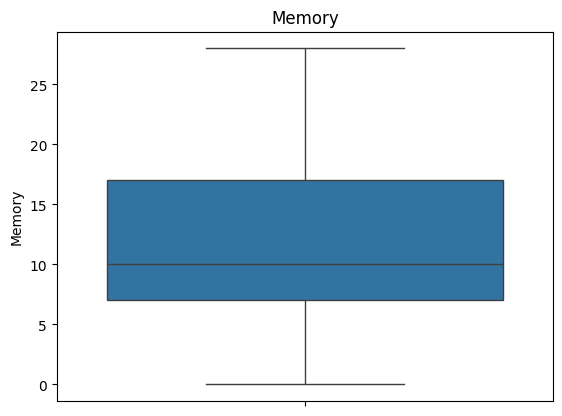

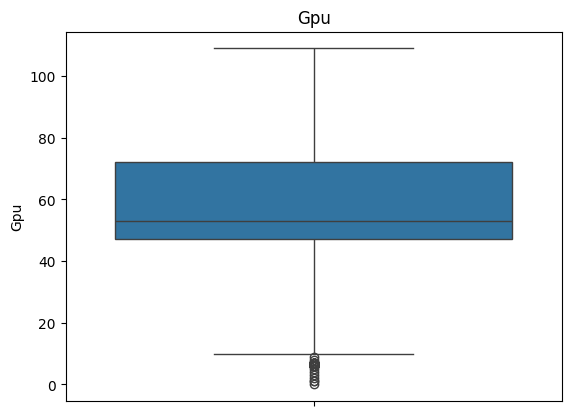

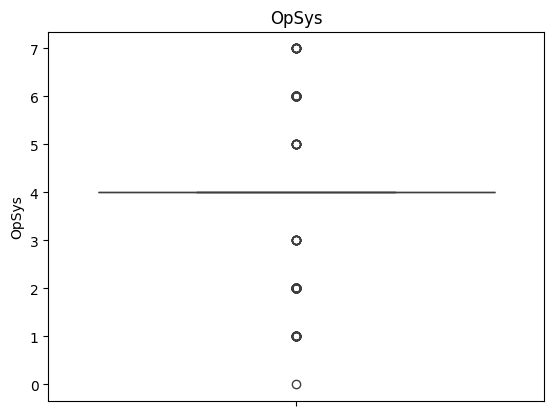

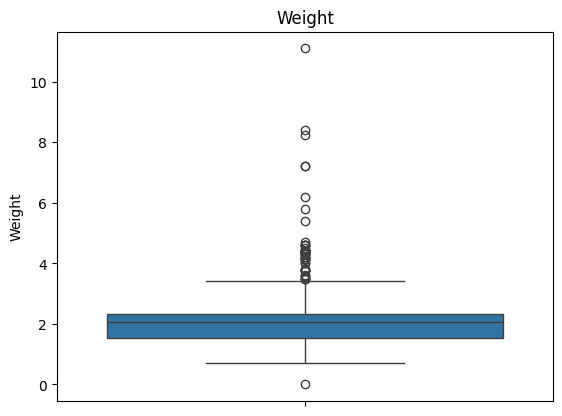

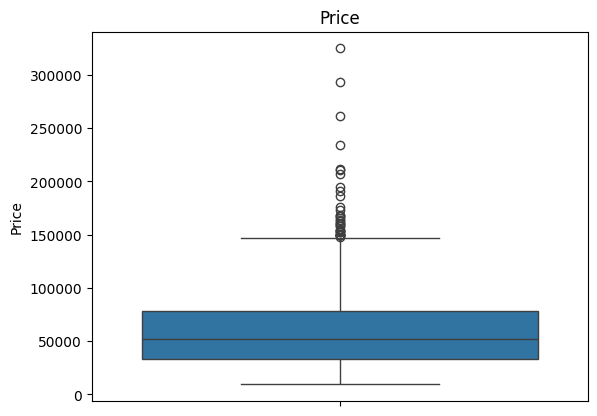

In [43]:
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [44]:
list_1=["Weight"]
def out(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lw=q1-1.5*iqr
  uw=q3+1.5*iqr
  return lw,uw
for i in list_1:
  lw,uw=out(df[i])
  df[i]=np.where(df[i]<lw,lw,df[i])
  df[i]=np.where(df[i]>uw,uw,df[i])

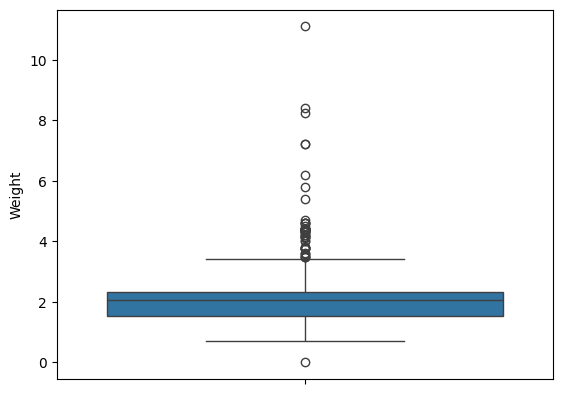

In [45]:
for i in list_1:
  sns.boxplot(df["Weight"])
  plt.show()

In [46]:
df["Weight"]

0        1.3700
1        1.3400
2        1.8600
3        1.8300
4        1.3700
5        2.1000
6        2.0400
7        1.3400
8        1.3000
9        1.6000
10       1.8600
11       1.8600
12       1.8300
13       2.2000
14       0.9200
15       1.3700
16       2.2000
17       1.8300
18       2.2000
19       1.2200
20       2.2000
21       2.5000
22       1.8600
23       1.6200
24       1.9100
25       2.3000
26       1.3500
27       2.2000
28       1.8800
29       2.5000
30       1.8900
31       1.6500
32       2.7100
33       1.2000
34       1.3500
35       1.4400
36       2.1000
37       2.8000
38       1.8600
39       2.1000
40       2.0000
41       2.6500
42       2.3000
43       2.2000
44       2.7700
45       1.3700
46       2.2000
47       3.2000
48       2.3000
49       2.8000
50       2.2000
51       2.2000
52       1.8600
53       1.4900
54       2.4000
55       2.1300
56       1.9100
57       2.0000
58       2.4300
59       2.0000
60       2.8000
61       1.7000
62      

In [47]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,4,13.3,2,8,2,58,7,1.37,71378.6832
1,1,4,13.3,2,8,2,51,7,1.34,47895.5232
2,7,3,15.6,2,8,10,53,4,1.86,30636.0000
3,1,4,15.4,3,16,20,9,7,1.83,135195.3360
4,1,4,13.3,2,8,10,59,7,1.37,96095.8080


In [48]:
%%capture
for col in df:
    if df[col].dtype == 'object':  # For categorical columns
        mode_value = df[col].mode()[0]  
        df[col].fillna(mode_value, inplace=True)  
    else:  # For numerical columns
        median_value = df[col].median()  
        df[col].fillna(median_value, inplace=True)


In [49]:
df.isna().sum()

Company     0
TypeName    0
Inches      0
Cpu         0
Ram         0
Memory      0
Gpu         0
OpSys       0
Weight      0
Price       0
dtype: int64

In [50]:
# now splitting the data
x=df.drop(columns="Price")
y=df["Price"]

In [51]:
x

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,4,13.3,2,8,2,58,7,1.3700
1,1,4,13.3,2,8,2,51,7,1.3400
2,7,3,15.6,2,8,10,53,4,1.8600
3,1,4,15.4,3,16,20,9,7,1.8300
4,1,4,13.3,2,8,10,59,7,1.3700
5,0,3,15.6,3,4,18,17,4,2.1000
6,1,4,15.4,3,16,10,60,3,2.0400
7,1,4,13.3,2,8,10,51,7,1.3400
8,2,4,14.0,3,16,20,98,4,1.3000
9,0,4,14.0,2,8,10,61,4,1.6000


In [52]:
y

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
5        21312.0000
6       114017.6016
7        61735.5360
8        79653.6000
9        41025.6000
10       20986.9920
11       18381.0672
12      130001.6016
13       26581.3920
14       67260.6720
15       80908.3440
16       39693.6000
17      152274.2400
18       26586.7200
19       52161.1200
20       52161.1200
21       53226.7200
22       13746.2400
23       43636.3200
24       35111.5200
25       22305.1392
26       58554.7200
27       42624.0000
28       69157.4400
29       47738.8800
30       13053.0672
31       10602.7200
32       23389.9200
33       99580.3200
34       53173.4400
35       13266.7200
36       19553.7600
37       52161.1200
38       26037.4032
39       46833.1200
40       20725.9200
41       79866.7200
42       27864.9072
43       36336.9600
44       53226.7200
45       75604.3200
46       52161.1200
47       69210.7200
48       34045.9200
49       24828.4800


In [53]:
# now splitting the dataset 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)
x_test.shape

(261, 9)

In [54]:
x_train.shape

(1042, 9)

In [55]:
y_test.shape

(261,)

In [56]:
# importing the the model
from sklearn.linear_model import LinearRegression
li=LinearRegression()
li.fit(x_train,y_train)
y_pred=li.predict(x_test)
y_pred.shape

(261,)

In [57]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(mse)
print(rmse)
r2=r2_score(y_test,y_pred)
print(r2)

448464843.38709444
21176.988534423264
0.6550468971067156


In [58]:
#random forest 
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
rr=RandomForestRegressor()
rr.fit(x_train,y_train)
y_pred1=rr.predict(x_test)
y_pred1

array([ 41775.619896  ,  94824.611136  ,  52161.12      ,  75323.0243328 ,
        48730.409256  ,  58897.342368  ,  72041.778996  , 219333.289824  ,
        16254.364032  ,  62989.08462514,  93605.28768   ,  75497.08512   ,
        40531.069248  ,  58747.849344  ,  63702.15408   ,  37719.639936  ,
       118790.90352   ,  94001.697984  ,  31685.76696   ,  74557.82088   ,
        11547.02808   ,  22380.77904   ,  76611.73824   ,  37781.252928  ,
        59578.70832   ,  74354.035536  ,  52161.12      ,  48728.26296   ,
        52161.12      ,  55490.741712  ,  41848.13664   ,  73546.5758928 ,
        18071.0664    ,  56729.2694112 ,  15958.991256  ,  73549.044     ,
       121621.664592  ,  54579.708768  ,  61468.8632064 ,  37820.314272  ,
        13957.86816   , 163553.978304  , 147649.994208  ,  33763.738464  ,
        48097.875312  ,  20140.1612784 ,  72191.943792  ,  45407.821392  ,
       111438.1836    ,  28414.76568   ,  81899.062512  ,  26863.520256  ,
        40083.82272   ,  

In [59]:
mse1=mean_squared_error(y_test,y_pred1)
print(mse1)
rmse1=np.sqrt(mse1)
print(rmse1)
r21=r2_score(y_test,y_pred1)
print(r21)

246480676.68652362
15699.70307638089
0.8104103911822946


In [60]:
df.columns


Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price'],
      dtype='object')

In [61]:
# decision tree
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor()
dr.fit(x_train,y_train)
y_pred2=dr.predict(x_test)
y_pred2

array([ 44542.08  ,  93240.    ,  52161.12  ,  85194.72  ,  58448.16  ,
        58448.16  ,  77143.3128, 324954.72  ,  13445.7408,  67212.72  ,
        79653.6   ,  55091.52  ,  46939.68  ,  78854.4   ,  46300.32  ,
        38378.6496, 118601.28  , 104961.6   ,  26267.04  ,  55091.52  ,
        11135.52  ,  20193.12  ,  71874.72  ,  28768.536 ,  67026.24  ,
        55091.52  ,  52161.12  ,  42037.92  ,  52161.12  ,  55890.72  ,
        46353.6   ,  71847.0144,  15930.72  ,  33513.12  ,  15397.92  ,
        81997.92  , 130482.72  ,  54984.96  ,  71395.2   ,  38468.16  ,
        16221.096 , 324954.72  , 126273.6   ,  33992.64  ,  47365.92  ,
        16463.52  ,  80908.344 ,  42038.4528,  99367.2   ,  29250.72  ,
       101232.    ,  32639.8608,  40226.4   ,  37242.72  ,  63243.36  ,
        23014.296 ,  37242.72  ,  57489.12  , 104961.6   ,  24988.32  ,
       101178.72  ,  20725.92  ,  50349.6   ,  16729.6536,  52161.12  ,
        36496.8   , 111834.72  ,  47686.1328,  20459.52  ,  3724

In [62]:
mse2=mean_squared_error(y_test,y_pred2)
print(mse2)
rmse2=np.sqrt(mse2)
print(rmse2)
r3=r2_score(y_test,y_pred2)
print(r3)

625570600.3326688
25011.409403163765
0.5188195399359175


In [63]:
# now knn 
from sklearn.neighbors import KNeighborsRegressor
kr=KNeighborsRegressor()
kr.fit(x_train,y_train)
y_pred3=kr.predict(x_test)
print(y_pred3)

[ 32149.47168  84320.928    52161.12     87826.752    40940.352
  80484.768    54931.68    159011.60256  18960.64704  46534.752
 136629.6336   76717.01952  51297.984    63776.16     54931.68
  38272.51584  86643.936    66940.992    27293.7456   56635.5744
  12520.8      28191.72672  90544.032    43050.45312  77362.45344
  82663.06752  52161.12     83481.98112  52161.12     56635.5744
  37292.8032   49805.0784   23622.96672  53237.376    17049.6
  54750.42144 120887.31168  66810.24288  56817.792    40632.9264
  14843.808    93277.61568 129740.84928  30220.416    52483.464
  22411.1664   49465.152    42570.93312  71352.576    34408.96992
  83758.39776  27424.49472  26405.568    47589.696    57574.368
  25840.8      50029.92     93297.75552 108659.12544  27448.7904
 114360.08544  44093.24928  42176.34144  19111.64256  47429.856
  41814.144    88689.888    70935.9264   15242.8752   32415.33888
  48729.888    86260.32     79110.144    52161.12     81921.7296
 124092.3168   54484.128    4625

In [64]:
mse3=mean_squared_error(y_test,y_pred3)
print(mse3)
rmse3=np.sqrt(mse3)
print(rmse3)
r4=r2_score(y_test,y_pred3)
print(r4)

348931417.7192193
18679.706039422017
0.7316066643482599


In [65]:
# now xgboost
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(x_train,y_train)
y_pred4=xg.predict(x_test)
print(y_pred4)

[ 40397.312  91075.6    51340.055  74351.39   52219.27   62683.887
  61210.01  200643.64   12545.717  71567.34  102298.06   75020.164
  43375.875  57982.25   62402.133  38161.68   98969.414 109297.56
  37913.52   76610.32   11961.966  31455.672  77694.805  36438.3
  59964.86   62951.61   51340.055  47170.7    51340.055  53783.812
  42679.293  74907.37   16672.121  67476.85   15390.438  70797.92
 127633.84   57745.36   45134.637  34981.582  32103.34  140611.25
 155214.84   37080.902  50817.62   18502.07   70795.3    47245.504
  87452.5    12458.839  77656.89   26352.57   41995.72   40766.383
  61621.94   25399.623  48076.625  63101.555 105000.945  31078.043
  97750.375  39201.465  43482.086  19348.928  57430.22   30321.564
 107539.836  70760.33   24137.74   50032.758  38072.57   61095.184
 105504.625  51340.055  69037.305 106374.13   48800.645  40300.598
  80941.67   82207.266  39856.52   93802.75   26130.777  35898.39
  37466.598  89568.86   74443.11  105629.17   64081.887  46137.445
 

In [66]:
mse4=mean_squared_error(y_test,y_pred4)
print(mse4)
rmse4=np.sqrt(mse4)
print(rmse4)
r5=r2_score(y_test,y_pred4)
print(r5)

233917794.38167748
15294.37133005726
0.8200735906420552


In [67]:
joblib.dump(rr, 'model.joblib')

['model.joblib']

In [68]:
df

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,4,13.3,2,8,2,58,7,1.3700,71378.6832
1,1,4,13.3,2,8,2,51,7,1.3400,47895.5232
2,7,3,15.6,2,8,10,53,4,1.8600,30636.0000
3,1,4,15.4,3,16,20,9,7,1.8300,135195.3360
4,1,4,13.3,2,8,10,59,7,1.3700,96095.8080
5,0,3,15.6,3,4,18,17,4,2.1000,21312.0000
6,1,4,15.4,3,16,10,60,3,2.0400,114017.6016
7,1,4,13.3,2,8,10,51,7,1.3400,61735.5360
8,2,4,14.0,3,16,20,98,4,1.3000,79653.6000
9,0,4,14.0,2,8,10,61,4,1.6000,41025.6000
